# **<center> Programming Session 1  </center>**


## <center> Credit Risk Prediction - Solution -  </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/Practical-Implementations-ENPC/">
    <img src="https://drive.google.com/uc?export=view&id=11gmHR08xN5A23wZ1ZTg6L3x-xhSC9Brx" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://drive.google.com/file/d/1rt-pjqh3xMQpmFvG1xNZNpjJdsmhYMIi/view?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

Cheat Sheets:

* [Jupyter Notebook Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/48093c40-5303-45f4-bbf9-0c96c0133c40)
* [Numpy](https://datacamp-community-prod.s3.amazonaws.com/e9f83f72-a81b-42c7-af44-4e35b48b20b7)
* [Pandas](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)
* [Matplotlib](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)
* [Scikit-learn](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)
* [Seaborn](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4)

# Connect Google Colab with Google Drive 

Go to the following [link](https://github.com/hm-ai/Practical-Implementations-ENPC) and download the csv file `german_credit_data.csv` (It's stored in the folder Session_1) and store it in your working directory. 

In [15]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
!ls 

gdrive	sample_data


# 1. Exploratory Data Analysis

## 1.1. Import Modules and explore the Dataset

Q1. First, let's start by importing the basic libraries:

* pandas to manipulate dataframes
* numpy to manipulate arrays
* matplotlib for the plots
* seaborn for fancy plots


In [17]:
# Import Modules
import pandas as pd # for dataframes
import numpy as np # for arrays
import seaborn as sns # for fancy plots 
import matplotlib.pyplot as plt # for plots 
from IPython.display import Image # for showing graphs from the lectures
plt.style.use('dark_background') # to adapt the colors to a dark background

Q2. Using pandas, import the csv file "german_credit_data.csv" and show the first 10 rows using dataframe.head(10) and the last 10 rows using dataframe.tail(10)

In [18]:
#Importing the data
df_credit = pd.read_csv("./gdrive/My Drive/german_credit_data (1).csv",index_col=0)

In [19]:
# 10 first rows
df_credit.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [20]:
# 10 last rows
df_credit.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


Q3. Show the basic informations of the dataset using dataframe.info() 

In [21]:
df_credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


There are two types of variables:

* **Categorical Variables** : for variables that take take a finite number of possibilities. (example: Sex : {male, female}). 

* **Numerical Variables**: for variables that take continuous values (example: Saving accounts $\in \mathbb{R}$)

We will see later how we process these two types of variables by one hot encoding the categorical variables and scaling the numerical variables. 

Q4. The column 'Risk' represent the target. Is the problem a binary classification problem or a multiclass classification one ? 
What about the other columns ? What kind of variables do we have ?
Using dataframe.column.unique() show the different categories of each categorical variable and the target

In [23]:
set(df_credit["Sex"].values)

{'female', 'male'}

In [24]:
print("Sex : ",df_credit.Sex.unique())
print("Job : ",df_credit.Job.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Purpose : ",df_credit.Purpose.unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Risk : ",df_credit['Risk'].unique())

Sex :  ['male' 'female']
Job :  [2 1 3 0]
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Checking account :  ['little' 'moderate' nan 'rich']
Risk :  ['good' 'bad']


In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of features. 

The target is: **Risk** (Good or Bad). It is a **binary classification problem**. 


The features can be summarized as follows:
    

*   **Age** (numerical)
*   **Sex** (categorical: male, female)
*   **Job** (categorical: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
*   **Housing** (categorical: own, rent, or free)
*   **Saving accounts** (categorical: little, moderate, quite rich, rich)
*   **Checking account** (categorical: little, moderate, rich)
*   **Credit amount** (numerical: in DM - Deutsch Mark)
*   **Duration** (numerical: in month)
*   **Purpose** (categorical: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)



Q5. Create the two following lists:
* catvars : list of categorical variable names -> [Sex, ... ]
* numsvars : list of numerical variable names -> [Age, ... ]

In [25]:
#create quickaccess list with categorical variables labels
catvars = ["Sex", "Job", "Housing", 'Saving accounts', 'Checking account', "Purpose"]
#create quickaccess list with numerical variables labels
numvars = ['Age', 'Credit amount', 'Duration']

Q6. Using dataframe[numvars].describe(), show the statistical characteristics of the numerical variables

In [26]:
# Numerical features 
df_credit[numvars].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


## 1.2 Create a new categorical feature

Q7. Create a new categorical feature named "Age_cat" by trasnforming the numerical feature "Age" into these 4 categories:

* Baby : if age in [min - 25]
* Young : if age in [25 - 35]
* Adult : if age in [35 - 60]
* Senior : if age in [60 - max]

In [27]:
df_credit.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [28]:
# Age intervals 
intervals = (18, 25, 35, 60, 120)
# Categories
list_cats = ['Baby', 'Young', 'Adult', 'Senior']
# Create the new column "Age_cat"
df_credit["Age_cat"] = pd.cut(df_credit.Age, intervals, labels=list_cats)

Q8. Add the new feature name "Age_cat" to the list "catvars" 

In [29]:
catvars.append("Age_cat")

In [30]:
catvars

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'Age_cat']

## 1.3 Handling missing values

Q9. Using dataframe.isnull().any() show which features have missing values. 

In [31]:
df_credit.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
Age_cat             False
dtype: bool

We have two columns with missing values: "Saving accounts" and "Checking account"

Q10. Using dataframe.isnull().sum() show how many missing values we have for each category ? 

In [32]:
df_credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Age_cat               0
dtype: int64

We have 183 missing values for "Saving accounts" and 394 missing values for "Checking account"

Q11. Show the rows where we have missing values for the "Checking account" category.

In [33]:
df_credit[df_credit["Checking account"].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Adult
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,Senior
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good,Adult
...,...,...,...,...,...,...,...,...,...,...,...
990,37,male,1,own,NaN,NaN,3565,12,education,good,Adult
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good,Young
994,50,male,2,own,NaN,NaN,2390,12,car,good,Adult
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Young


There are two ways of handling the missing values of a categorical variable. 

* First method: We ignore the NaN value (we will see that later)
* Second method: We create a new category for the NaN values. 

Let's use the second method for the "Checking account" category. 

Q12. Replace all the NaNs values of the "Checking account" category by a new category called "unknown"

In [34]:
df_credit["Checking account"] = df_credit["Checking account"].fillna("unknown")

Q13. As a sanity check, show the rows where we have missing values for the "Checking account" category 

In [35]:
df_credit[df_credit["Checking account"].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat


As expected, there are no more NaNs for the "Checking account" category. 

Q14. Show show the rows where we have missing values for the "Saving accounts" category.

In [36]:
df_credit[df_credit["Saving accounts"].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
5,35,male,1,free,NaN,unknown,9055,36,education,good,Young
16,53,male,2,own,NaN,unknown,2424,24,radio/TV,good,Adult
17,25,male,2,own,NaN,little,8072,30,business,good,Baby
24,26,male,2,own,NaN,unknown,2069,10,furniture/equipment,good,Young
...,...,...,...,...,...,...,...,...,...,...,...
968,29,male,2,rent,NaN,unknown,7166,42,radio/TV,good,Young
977,42,male,2,own,NaN,moderate,2427,18,business,good,Adult
990,37,male,1,own,NaN,unknown,3565,12,education,good,Adult
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good,Baby


In [37]:
df_credit["Saving accounts"] = df_credit["Saving accounts"].fillna("unknown")

In [38]:
df_credit[df_credit["Saving accounts"].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat


In [39]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
 10  Age_cat           1000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 87.1+ KB


## 1.4 Visualization 

### 1.4.1 Count plot for a categorical variabel. 

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.

Q15. Using seaborn.countplot, display the **count plot** of the categorical variable "Saving Accounts (where you separate the counts for the good and bad targets)

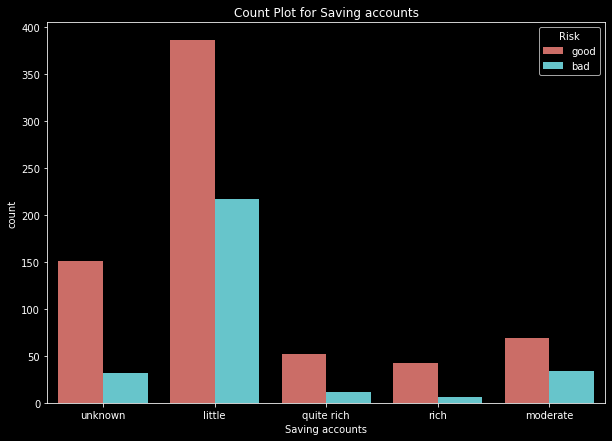

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls",hue="Risk")
g.set_title("Count Plot for Saving accounts")
plt.show()

Q16. What category is the dominant one in the dataset ? 

The "little" category is clearly the dominant one in the dataset

Q17. Is there a category of samples for which we have more "bad" targets than "good" ones ? 

For all the categories, we have more samples associated with "good" targets than "bad" targets. 

### 1.4.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "good" and the "bad" targets. 

Q18. Using seaborn.displot, display the distribution of the "Duration" numerical variable for the good and the bad targets. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


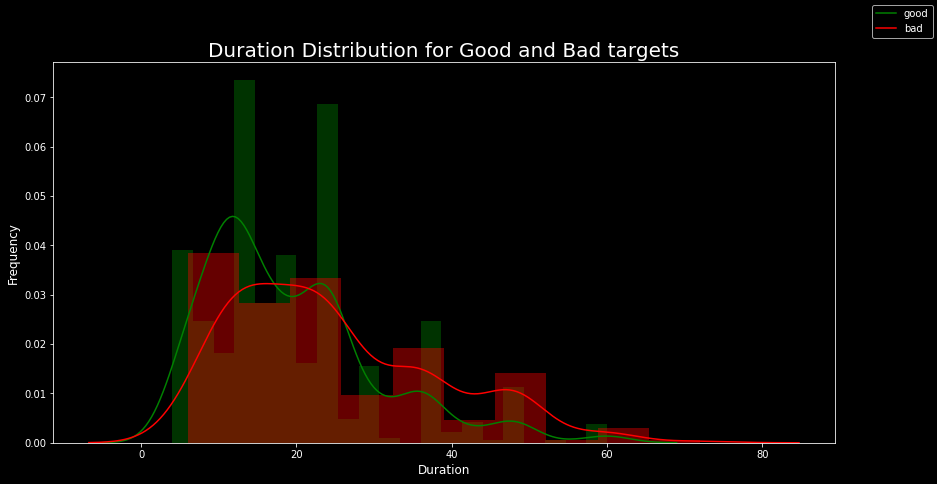

In [41]:
fig, ax = plt.subplots(figsize=(14, 7))
g = sns.distplot(df_credit[df_credit["Risk"]=="good"]["Duration"], ax=ax, color='g')
g = sns.distplot(df_credit[df_credit["Risk"]=="bad"]["Duration"], ax=ax, color='r')
g.set_xlabel("Duration", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Duration Distribution for Good and Bad targets", fontsize=20)
fig.legend(labels=['good','bad'])
plt.show()

Q19. What can you say about these distributions ? 

It appears that the ditribution of the "Duration" variable for the "bad" target is a little bit shifted in comparison with the one with the "good" target

### 1.4.3 Boxplots 

Now, we want to show the distribution of a numerical variable for all the values of a categorical variable

To that end, we use box plots:

Boxplots display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* **median (Q2/50th Percentile)**: the middle value of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **maximum**: Q3 + 1.5*IQR
* **minimum**: Q1 -1.5*IQR 


Q20. Using seaborn.boxplot, display the distribution of the numerical variable "Credit amount" across all the levels of the categorical variable "Purpose". Again, seperate the good and the bad targets

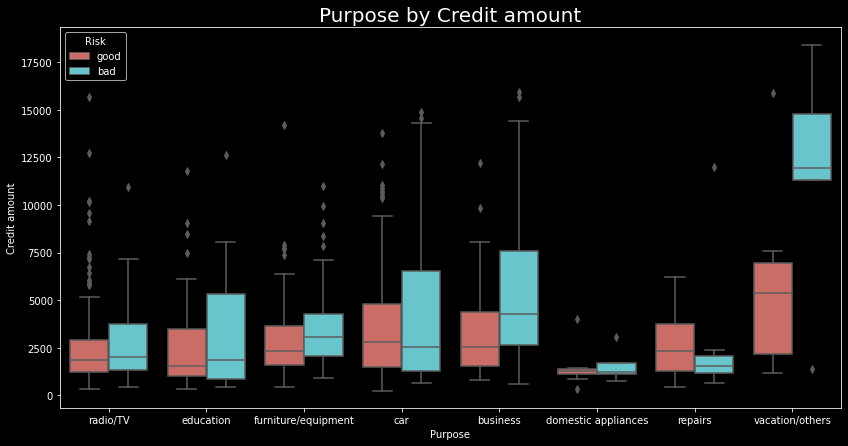

In [42]:
fig, ax = plt.subplots(figsize=(14, 7))
g = sns.boxplot(ax=ax, x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g.set_title("Purpose by Credit amount", fontsize=20)
plt.show()

Q21. For which category do we have clearly separated distributions of the numerical "Credit Amount" variable according to the good and bad targets ? 

* It seems that for all the categories, the "Credit amount" distribution is a little bit shifted for the "bad" target in comparision with the "good" target. 
* The separation is clearly more obvious for the "vacation/others" category. 

[**Poll -Group1-**](https://forms.gle/EXBkywEmBd8HyWMr6) 

[**Poll -Group2-**](https://forms.gle/WuKE2ixijuXzUAew5)

# 2. Preprocessing the data

Q22. Using dataframe.copy(), keep a copy of the dataframe before performing the preprocessing transformations. 

In [43]:
df = df_credit.copy()

## 2.1 Binarizing the targets

Q23. Replace the values of the target:
* "good" $\rightarrow$ 1
* "bad" $\rightarrow$ 0

In [44]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
df.Risk.replace(["good","bad"], [1,0], inplace=True)

In [45]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,unknown,little,1169,6,radio/TV,1,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,Baby
2,49,male,1,own,little,unknown,2096,12,education,1,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,Adult
4,53,male,2,free,little,little,4870,24,car,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1,Young
996,40,male,3,own,little,little,3857,30,car,1,Adult
997,38,male,2,own,little,unknown,804,12,radio/TV,1,Adult
998,23,male,2,free,little,little,1845,45,radio/TV,0,Baby


## 2.2 Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually frop the K-th feature column because

Q24. For each categorical variable, pring the names of the different categories and their number.

The categories:

In [46]:
for feature in catvars:
  print("Feature: {} ... Categories: {}".format(feature, df_credit[feature].unique()))

Feature: Sex ... Categories: ['male' 'female']
Feature: Job ... Categories: [2 1 3 0]
Feature: Housing ... Categories: ['own' 'free' 'rent']
Feature: Saving accounts ... Categories: ['unknown' 'little' 'quite rich' 'rich' 'moderate']
Feature: Checking account ... Categories: ['little' 'moderate' 'unknown' 'rich']
Feature: Purpose ... Categories: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Feature: Age_cat ... Categories: ['Senior', 'Baby', 'Adult', 'Young']
Categories (4, object): ['Baby' < 'Young' < 'Adult' < 'Senior']


The number of categories:

In [47]:
df[catvars].nunique()

Sex                 2
Job                 4
Housing             3
Saving accounts     5
Checking account    4
Purpose             8
Age_cat             4
dtype: int64

Q25. Print the shape of data before One Hot Encoding

In [48]:
df.shape

(1000, 11)

Q26. Using pandas.get_dummies or sklearn.preprocessing.OneHotEncoder, transform each categorical variable (with K categories) into K-1 new feature columns.

In [49]:
df = pd.get_dummies(df, 
                    columns= catvars, # categorical Variables 
                    dummy_na= False, # ignore NaNs
                    drop_first=True) # Turn K categorical Variable into K-1 Dummy variables

Q27. Determine the dimensionality of the dataset (i.e, the number of features) after the one hot encoding ? 

If each categorical variable $c$ has $K_c$ different categories. Let's $D_{\text{num}}$ be the number of numerical variables and $D_{\text{cat}}$ the number of categorical variables after the one hot encoding.The number of features $D$ is the following:

\begin{align}
D &= \sum_c^{D_{\text{cat}}} (K_C -1)+ D_{\text{num}} \\
&= (K_{\text{Sex}} - 1) + (K_{\text{Job}} - 1) + (K_{\text{Housing}} - 1) + (K_{\text{Saving accounts}} - 1) + (K_{\text{Checking account}} - 1) + (K_{\text{Purpose}} - 1) + (K_{\text{Age_cat}} - 1) + N_{\text{num}} \\
&= (2 - 1) + (4 -1) + (3 - 1) + (4 - 1) + (4 - 1) + (8 - 1) + (4 - 1) + 3 \\
&= 25
\end{align}


Q28. Print the new shape of data. Does it correspond to your calculations ?

In [50]:
df.shape

(1000, 27)

Yes. We have 25 features and 1 column for the target. 

In [51]:
df.columns

Index(['Age', 'Credit amount', 'Duration', 'Risk', 'Sex_male', 'Job_1',
       'Job_2', 'Job_3', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Saving accounts_unknown',
       'Checking account_moderate', 'Checking account_rich',
       'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Age_cat_Young', 'Age_cat_Adult',
       'Age_cat_Senior'],
      dtype='object')

## 2.3 Preprocessing Numerical Variables

There are two ways of scaling a numerical variable:

There are two ways of scaling Numerical Features:

* Method 1: To the range [0, 1] by performing the following transformation:
$$
X \leftarrow \frac{X - X.min()}{X.max() - X.min()}
$$

* Method 2: To a distribution with mean = 0 and std = 1 by using the following normalization:
$$
X \leftarrow \frac{X - X.mean()}{X.std()}
$$

Q29. Split your dataframe into two subdataframes:

* "df_numvars": containing the three columns of the numerical features
* "df_rest": containing the rest of the features and the target 

In [52]:
# take numerical features
df_numvars = df[numvars]
# exclude columns you don't want
df_rest = df[df.columns[~df.columns.isin(numvars)]]

Q30. Plot the histograms of the three numerical variables of "df_numbars" using dataframe.hist()

In [53]:
df_rest

,Risk,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
996,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
997,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
998,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


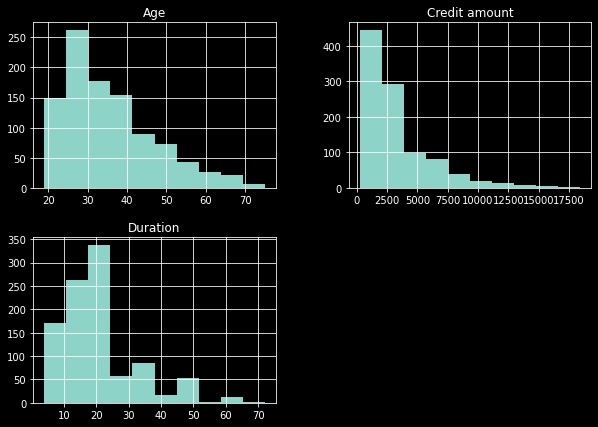

In [54]:
df_numvars.hist(figsize=(10, 7))
plt.show()

Q31. Using sklearn.preprocessing, scale the numerical features using one of the two scaling methods 

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardization
df_numvars_std = pd.DataFrame(StandardScaler().fit_transform(df_numvars))
# MinMax Rescaling to [0,1]
df_numvars_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df[numvars]))

Q32. Plot the histograms of the three numerical features after the scaling process. 

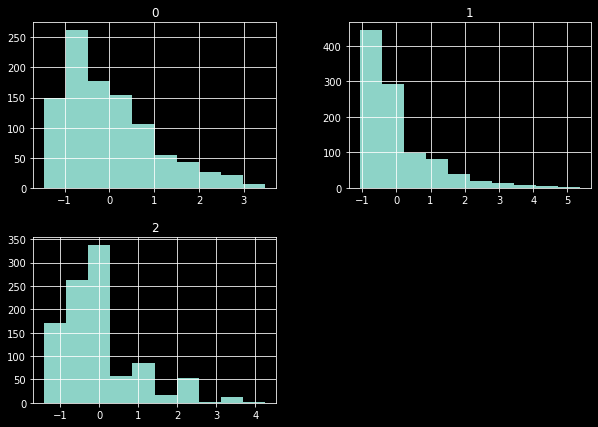

In [56]:
df_numvars_std.hist(figsize=(10, 7))
plt.show()

Q33. Concatenate "df_rest" with your scaled dataframe of numerical features. 

In [57]:
data = pd.concat([df_numvars_std, df_rest], axis = 1)

Q34. Show the first 10 rows of the new dataset

In [58]:
data.head(10)
data.shape

(1000, 27)

## 2.4 Split the dataset into X_train, y_train, X_test, y_test

Q35. Seperate your final dataframe into: 

* X : The features
* Y : The targets

In [59]:
X = data.drop("Risk", 1).values
Y = data[["Risk"]].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Q36. Split the data (X, Y) into (X_train, X_test, Y_train, y_test) using train_test_split from sklearn.model_selection (use 30% of the data for the test set).

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y[:, 0], 
                                                    test_size=0.3, # fraction of test set
                                                    random_state=1) # to fix the seed

[**Poll -Group1-**](https://forms.gle/KSArVPUcHyDFAncdA) 

[**Poll -Group2-**](https://forms.gle/C9MoefzpnVkFkfRXA)

# 3. Supervised Models

## 3.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

The F1 score is calculated as follows: 

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Q37. Which of the two errors is the most dangerous one for the credit problem ? 

The worst error is to predict a positive class (which means assigning the label "good") to a sample that is actually in the negative class (i.e with label "bad"). 

Therefore, the metric we should optimize is the precision metric. 

A brief review of Cross Validation:

Q38. Using cross_val_score from sklearn.model_selection, write a function that takes as inputs the classifier, the training features and the training targets. The function should output the distribution (the mean and the std) of the following performance measures using cross validation. 

* Presicion
* Recall
* f1 score
* auc
* accuracy


In [61]:
# Import module 
from sklearn.model_selection import cross_val_score
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X,y):
    precision = cross_val_score(clf, X, y, cv=10, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=10, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=10, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

Q39. Using confusion_matrix from sklearn.metrics, write a function that takes as inputs the classifier **after training**, the test features and the test targets. The function should output a plot of the confusion matrix on the test set. 

In [68]:
# Import module
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(clf, X, y):
  # Predict the test data using the best model
  y_pred = clf.predict(X)
  # Create the confusion matrix 
  confmat = confusion_matrix(y_true=y, y_pred=y_pred)
  # Plot the confusion matrix in a fancy way 
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

  plt.xlabel('predicted label')
  plt.ylabel('true label')

  plt.tight_layout()
  plt.show()

## 3.2 Fine Tuning SVD and Random Forest

Brief review of Grid Search:

Q39. Using the code from Programming_Session_1, create a pipeline composed of:

* SVD (use TruncatedSVD from sklearn.decomposition) as a dimensionality reduction technique. 
* Random Forest 

Fine Tune the hyperparameters using Grid Search and determine the optimal model. 

In [69]:
# Import Modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

# Create a default model
pipe_rf = Pipeline([('svd', TruncatedSVD(n_components=2)),
                    ('clf', RandomForestClassifier(n_estimators=10))])

# Create a list of choices for each hyperparameter
param_range_svd = [2, 5, 10, 15, 20] # dimension of the data after dimensionality reduction 
param_range_clf = [5, 10, 20, 30] # number of trees in RandomForest

# Create the grid of possible combinations 
param_grid = [{'svd__n_components': param_range_svd,
               'clf__n_estimators': param_range_clf,
               'clf__max_features': param_range_clf}]

# Prepare the Grid Search Fine Tuning 
gs = GridSearchCV(estimator=pipe_rf, # the model
                  param_grid=param_grid, # its hyperparameters possibilities
                  scoring='precision', # precision is the evaluation metric
                  cv=5, # We use 5 folds in cross validation
                  n_jobs=-1)

# Test all the possible hyperparameters
gs = gs.fit(X_train, y_train)

# The best hyperparameters
print("The optimal precision is {}".format(gs.best_score_))
print("The optimal hyperparameters are {}".format(gs.best_params_))

The optimal precision is 0.7929719312945119
The optimal hyperparameters are {'clf__max_features': 10, 'clf__n_estimators': 10, 'svd__n_components': 20}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pac

Q40. Display the different performance measures and the confusion matrix for the "optimal" pipeline composed of SVD and Random Forest. 




Pipeline(steps=[('svd', TruncatedSVD(n_components=20)),
                ('clf',
                 RandomForestClassifier(max_features=10, n_estimators=10))])
Cross Validation Precision: 0.75 (+/- 0.03)
Cross Validation Recall: 0.78 (+/- 0.06)
Cross Validation f1 score: 0.79 (+/- 0.03)
Cross Validation roc_auc: 0.68 (+/- 0.06)
Cross Validation Accuracy: 0.69 (+/- 0.05)


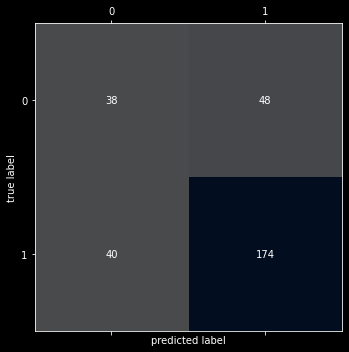

In [72]:
# Optimal model
best_rf_svd = gs.best_estimator_
print(best_rf_svd)
# Evaluation performances
crossvalidate(best_rf_svd, X_train, y_train)
# Confusion Matrix
plot_confusion_matrix(best_rf_svd, X_test, y_test)

## 3.3 Fine Tuning PCA and Logistic Regression

Q41. Using the code from Programming_Session_1, create a pipeline composed of:

* PCA as a dimensionality reduction technique. 
* Logistic Regression 

Fine Tune the hyperparameters using Grid Search and determine the optimal model. 

In [65]:
# Import Modules 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


# Create a default model
pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs'))])

# Create a list of choices for each hyperparameter
param_range_pca = [2, 5, 10, 5, 20] # dimension of the data after dimensionality reduction 
param_clf = ['l1', 'l2'] 

# Create the grid of possible combinations 
param_grid = [{'pca__n_components': param_range_pca,
               'clf__penalty': param_clf}]

# Prepare the Grid Search Fine Tuning 
gs = GridSearchCV(estimator=pipe_lr, # the model
                  param_grid=param_grid, # its hyperparameters possibilities
                  scoring='precision', # precision is the evaluation metric
                  cv=5, # We use 5 folds in cross validation
                  n_jobs=-1)

# Test all the possible hyperparamters
gs = gs.fit(X_train, y_train)

# The best hyperparameters
print("The optimal precision is {}".format(gs.best_score_))
print("The optimal hyperparameters are {}".format(gs.best_params_))

The optimal precision is 0.7547698086298349
The optimal hyperparameters are {'clf__penalty': 'l2', 'pca__n_components': 20}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

Q42. Display the different performance measures and the confusion matrix for the "optimal" pipeline composed of PCA and Logistic Regression. 


Pipeline(steps=[('svd', TruncatedSVD(n_components=20)),
                ('clf',
                 RandomForestClassifier(max_features=10, n_estimators=10))])
Cross Validation Precision: 0.76 (+/- 0.02)
Cross Validation Recall: 0.79 (+/- 0.05)
Cross Validation f1 score: 0.79 (+/- 0.03)
Cross Validation roc_auc: 0.67 (+/- 0.04)
Cross Validation Accuracy: 0.70 (+/- 0.04)


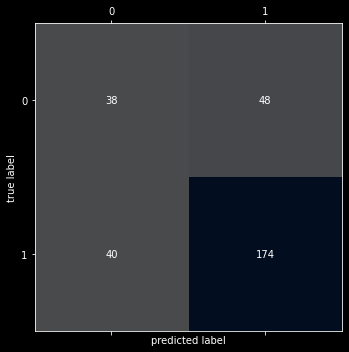

In [73]:
best_pca_lr = gs.best_estimator_
print(best_pca_lr)
crossvalidate(best_pca_lr, X_train, y_train)
plot_confusion_matrix(best_pca_lr, X_test, y_test)

[**Poll -Group1-**](https://forms.gle/wX9gXR6wPxeECkFHA) 

[**Poll -Group2-**](https://forms.gle/Lkm3yQTfWVyJSv147)